In [13]:
from fasp.loc import sbcgcDRSClient, DRSMetaResolver
from IPython.display import Image
import requests

drsClient = sbcgcDRSClient('/Users/forei/.keys/sevenbridges_keys.json', 's3')
tile_id ='601fdb3c0a9d98531cd67f91'
drsClient.getObject(tile_id)
tile_url = drsClient.getAccessURL(tile_id)
Image(url=tile_url) 


In [7]:
level6_id = '601fdaaae036a06dd8522e9d'
level6_url = drsClient.getAccessURL(level6_id)
Image(url=level6_url)

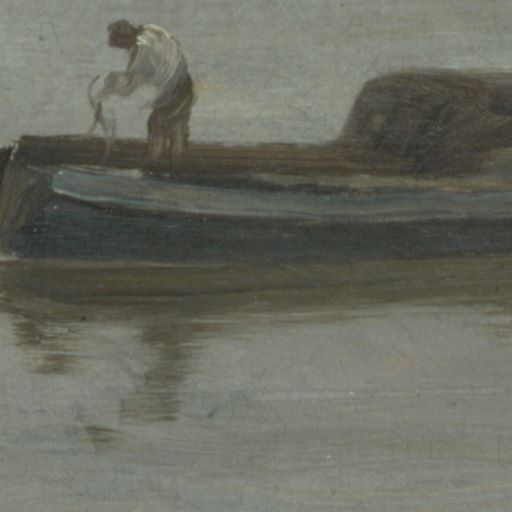

In [3]:
from PIL import Image as pim
region_ids = [['601fdb3c0a9d98531cd67f91','601fe543e036a06dd8522ecb'],
['601fe52be036a06dd8522ec4','601fe544e036a06dd8522ece']]

def assembleImage(idGrid):
    cols = len(idGrid[0])
    rows = len(idGrid)
    cw = 256
    ch = 256
    final_im = pim.new('RGB', (cw * cols, ch * rows))
    y_offset = 0
    for r in idGrid:
        x_offset = 0
        for c in r:
            im = pim.open(requests.get(drsClient.getAccessURL(c), stream=True).raw)
            final_im.paste(im, (x_offset,y_offset))
            x_offset += cw
        y_offset += ch
    return final_im

assembleImage(region_ids)

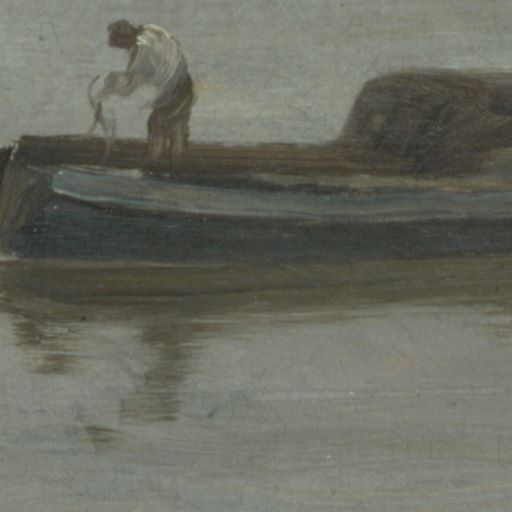

In [6]:
def assembleImage(idGrid):
    mr = DRSMetaResolver(getReg=False)
    cols = len(idGrid[0])
    rows = len(idGrid)
    cw = 256
    ch = 256
    final_im = pim.new('RGB', (cw * cols, ch * rows))
    y_offset = 0
    for r in idGrid:
        x_offset = 0
        for c in r:
            im = pim.open(requests.get(mr.getAccessURL(c), stream=True).raw)
            final_im.paste(im, (x_offset,y_offset))
            x_offset += cw
        y_offset += ch
    return final_im

region_ids = [['sbcgc:601fdb3c0a9d98531cd67f91','sbbdc:601ff5dbd86c36184354dec4'],
['sbcav:601ff3fe42e8973aba24f0fb','sbcgc:601fe544e036a06dd8522ece']]
assembleImage(region_ids)


In [27]:
class MyImage:
    
    def __init__(self, cols, rows):
        self.cw = 256
        self.ch = 256
        self.cols = cols
        self.rows = rows
        self.final_im = pim.new('RGB', (self.cw * cols, self.ch * rows))
        self.grid = []
        for r in range(rows):
            self.grid.append([None] * cols)

    def assembleImage(self):
        mr = DRSMetaResolver(getReg=False)
        y_offset = 0
        for r in self.grid:
            x_offset = 0
            for c in r:
                if c != None:
                    im = pim.open(requests.get(mr.getAccessURL(c), stream=True).raw)
                    self.final_im.paste(im, (x_offset,y_offset))
                x_offset += self.cw
            y_offset += self.ch
        return self.final_im

big_image = MyImage(20,17)

[[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None], [None, None, None, None

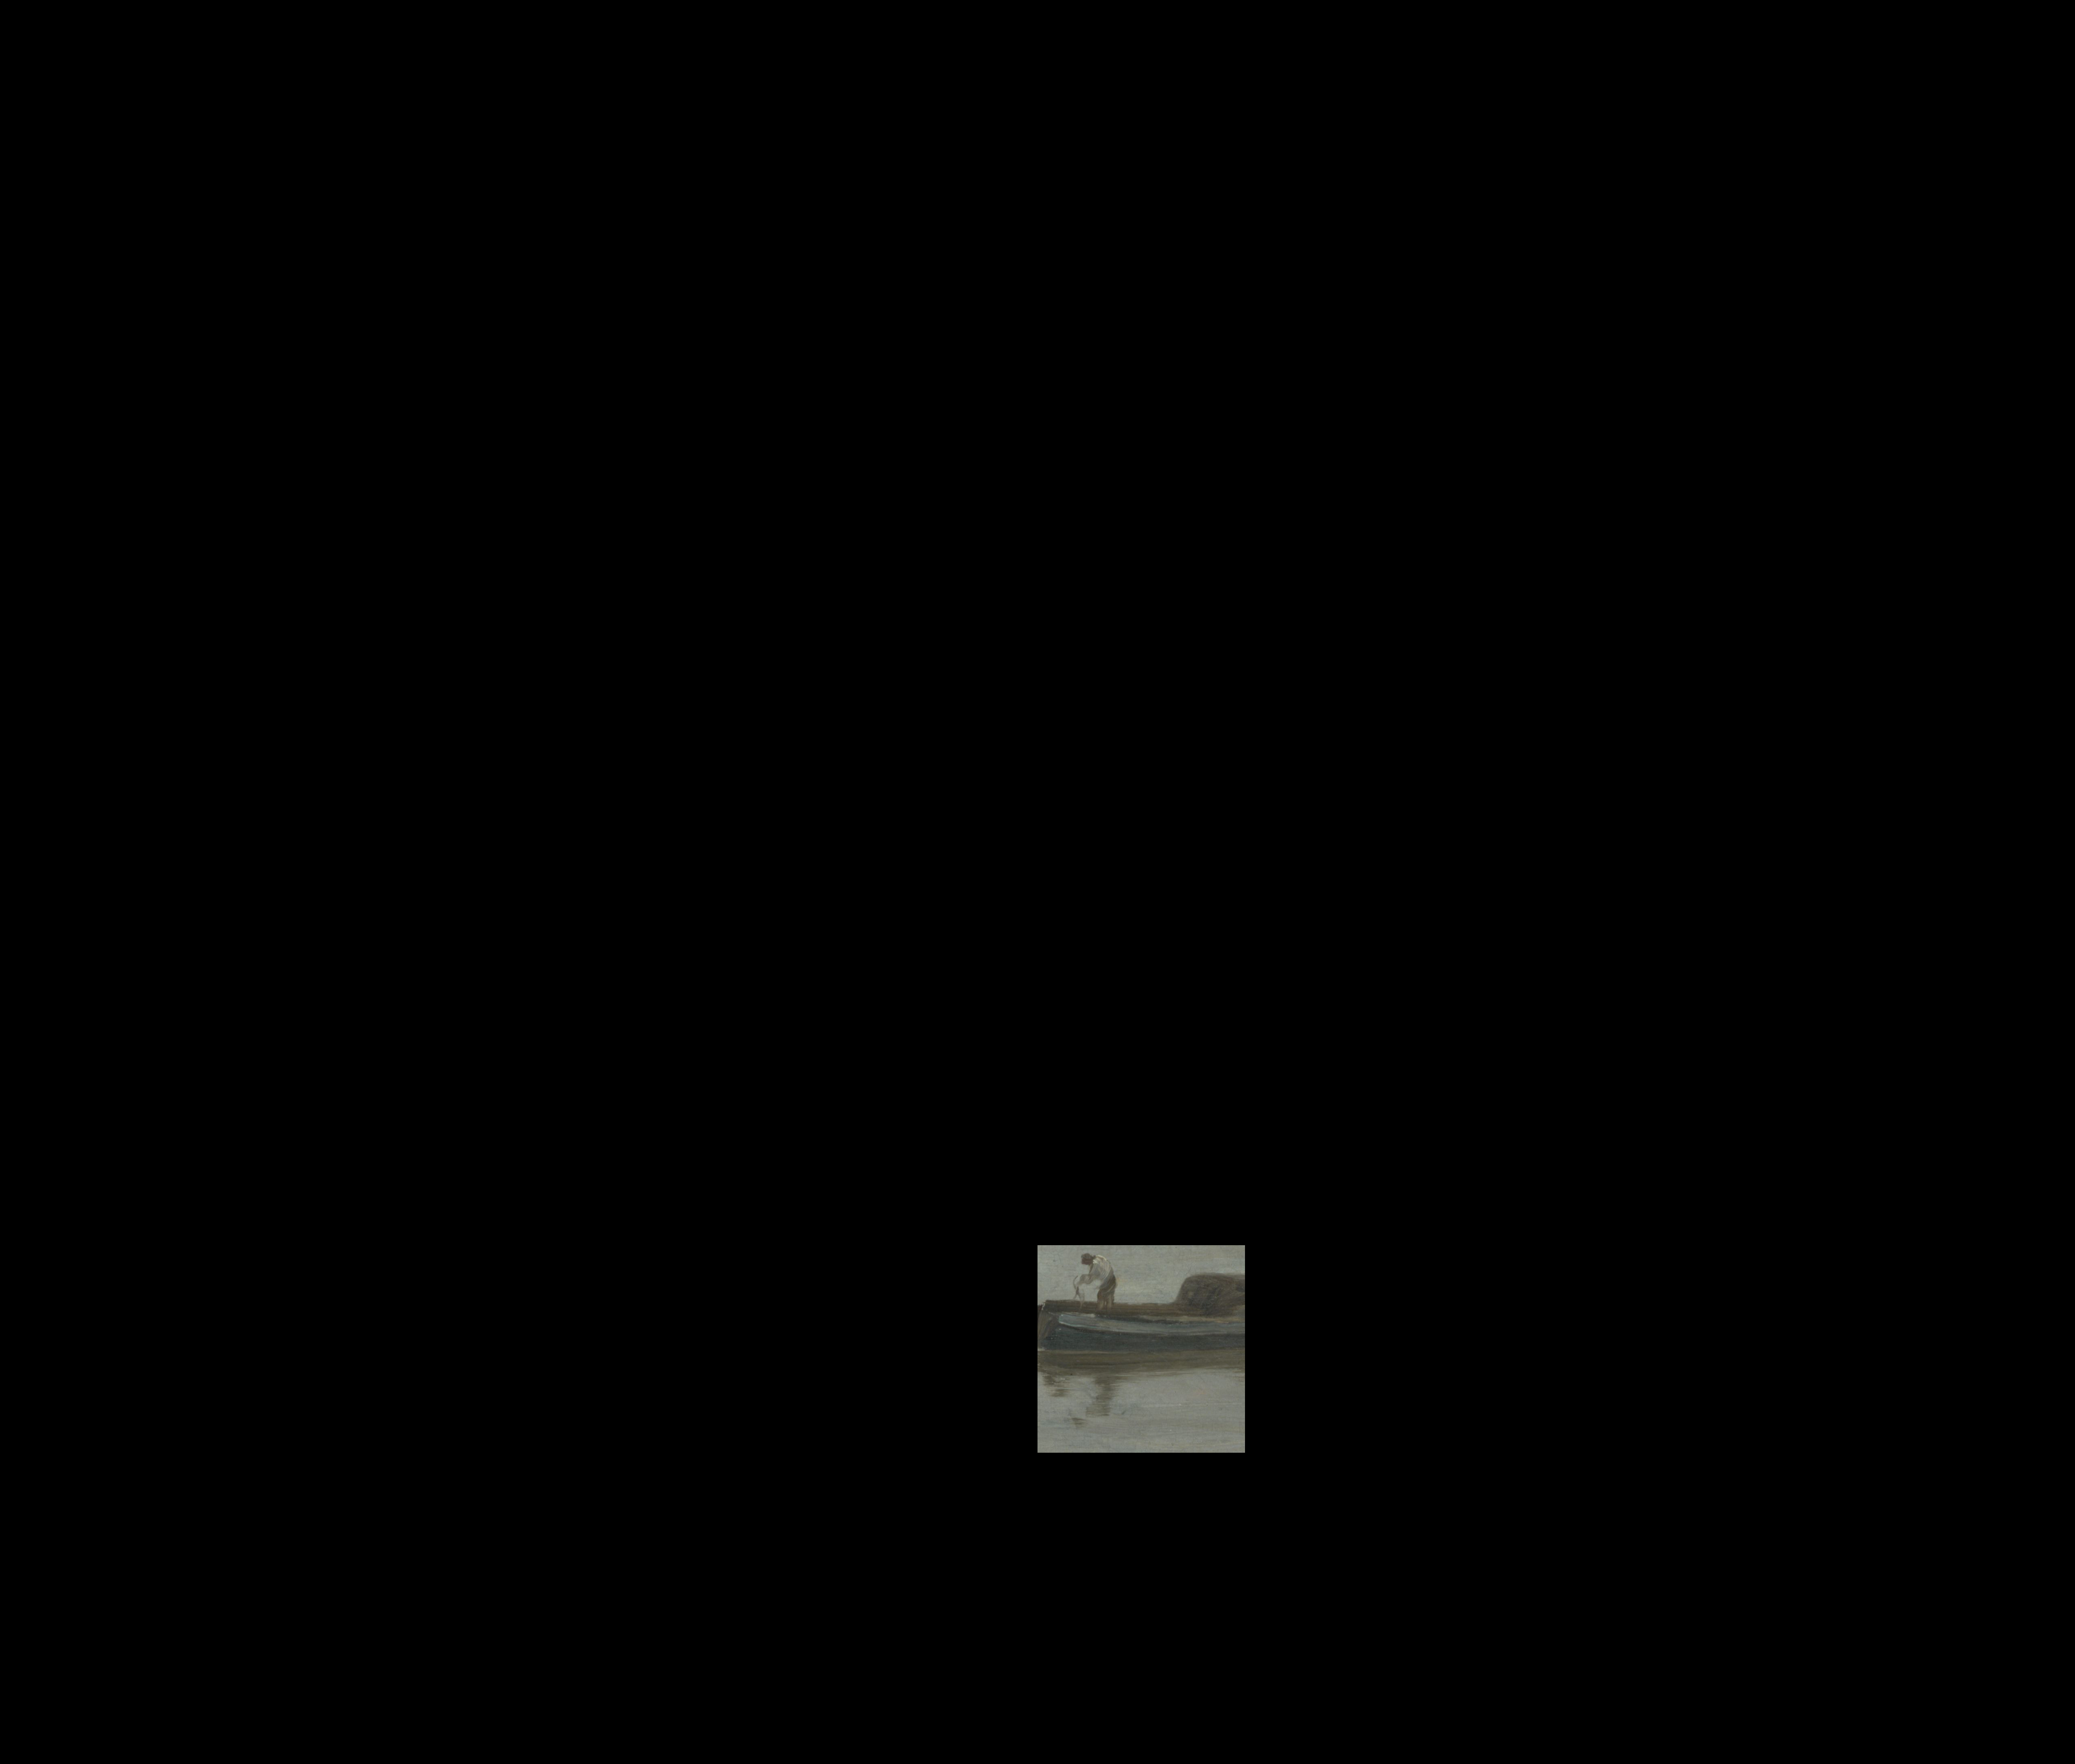

In [29]:
big_image.grid[12][10] = 'sbcgc:601fdb3c0a9d98531cd67f91'
big_image.grid[12][11] = 'sbbdc:601ff5dbd86c36184354dec4'
big_image.grid[13][10] = 'sbcav:601ff3fe42e8973aba24f0fb'
big_image.grid[13][11] = 'sbcgc:601fe544e036a06dd8522ece'

big_image.assembleImage()